# Required end-of-module assignment: Solving real-world problems with SQL
---

## Overview

In this assignment, you will bring together all the skills you have learned in Module 6.

This assignment is designed to build your familiarity and comfort coding in Python while also helping you review key topics from each module. As you progress through the assignment, questions will get increasingly more complex. It is important that you adopt a programmer's mindset when completing this activity. Remember to run your code from each cell before submitting your activity, as doing so will give you a chance to fix any errors before submitting.
 
Please refer to the database schemas provided in case you need more details about the database schema.
 
### Learning outcomes addressed
- Explore a new database.
- Develop complex queries incrementally.
- Interface with SQL databases from Python.



## Index:

- [Question 1](#Question-1)
- [Question 2](#Question-2)
- [Question 3](#Question-3)
- [Question 4](#Question-4)
- [Question 5](#Question-5)
- [Question 6](#Question-6)
- [Question 7](#Question-7)
- [Question 8](#Question-8)
- [Question 9](#Question-9)
- [Question 10](#Question-10)

Run the cell below to import the required Python libraries.

In [1]:
#Imports
import pandas as pd
import psycopg2 as pg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Run the cell below to create a connection to the **dvdrental** database.

In [2]:
connection = pg.connect(host = 'localhost',
                        database = 'dvdrental',
                        user = 'postgres',
                        password = 'codio')

###### [Back to top](#Index:) 

### Question 1

**Perform the following task using the `connection` defined above:**

- Create a **cursor** object from the `connection`.
- Use the cursor to **execute the following SQL query** stored in the variable `query` using the cursor's `execute` method.:
  ```sql
  SELECT * FROM customer LIMIT 5;
  ```
- Fetch the **first row only** from the result set using `.fetchone()`.
- Assign the result (a single tuple) to a variable named **`ans1`**.
- Close the cursor after fetching the result.

**Note:**
- Do not convert the result into a DataFrame. Simply return the raw row (a tuple) from the query.

In [3]:
ans1 = None
query = 'SELECT * FROM customer LIMIT 5' 
### BEGIN SOLUTION
cursor = connection.cursor()
cursor.execute(query)
ans1 = cursor.fetchone()
cursor.close()
### END SOLUTION
#Answer test
print(ans1)

(524, 1, 'Jared', 'Ely', 'jared.ely@sakilacustomer.org', 530, True, datetime.date(2006, 2, 14), datetime.datetime(2013, 5, 26, 14, 49, 45, 738000), 1)


In [4]:
### BEGIN HIDDEN TESTS
query_ = 'SELECT * FROM customer LIMIT 5'  
cursor_ = connection.cursor()
cursor_.execute(query_)
ans1_ = cursor_.fetchone()
cursor_.close()
assert ans1 == ans1_
### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 2

**Perform the following tasks:**

- Using the **connection** defined above:
  - Execute the following SQL query using a cursor:
    ```sql
    SELECT * FROM film ORDER BY film_id DESC LIMIT 10;
    ```
  - Fetch **all** rows from the result set using `.fetchall()`.
  - Assign the result (a list of tuples) to a variable named **`ans2`**.
  - Close the cursor after fetching the data.

**Note:**  
- The output should be a list of tuples, where each tuple represents a row from the `film` table.



In [5]:
ans2 = None
query = 'SELECT * FROM film ORDER BY film_id DESC LIMIT 10;'  
### BEGIN SOLUTION
cursor = connection.cursor()
cursor.execute(query)
ans2 = cursor.fetchall()
cursor.close()
### END SOLUTION
#Answer test
print(ans2)

[(1000, 'Zorro Ark', 'A Intrepid Panorama of a Mad Scientist And a Boy who must Redeem a Boy in A Monastery', 2006, 1, 3, Decimal('4.99'), 50, Decimal('18.99'), 'NC-17', datetime.datetime(2013, 5, 26, 14, 50, 58, 951000), ['Trailers', 'Commentaries', 'Behind the Scenes'], "'ark':2 'boy':12,17 'intrepid':4 'mad':8 'monasteri':20 'must':14 'panorama':5 'redeem':15 'scientist':9 'zorro':1"), (999, 'Zoolander Fiction', 'A Fateful Reflection of a Waitress And a Boat who must Discover a Sumo Wrestler in Ancient China', 2006, 1, 5, Decimal('2.99'), 101, Decimal('28.99'), 'R', datetime.datetime(2013, 5, 26, 14, 50, 58, 951000), ['Trailers', 'Deleted Scenes'], "'ancient':19 'boat':11 'china':20 'discov':14 'fate':4 'fiction':2 'must':13 'reflect':5 'sumo':16 'waitress':8 'wrestler':17 'zooland':1"), (998, 'Zhivago Core', 'A Fateful Yarn of a Composer And a Man who must Face a Boy in The Canadian Rockies', 2006, 1, 6, Decimal('0.99'), 105, Decimal('10.99'), 'NC-17', datetime.datetime(2013, 5, 26

In [6]:
### BEGIN HIDDEN TESTS
query_ = 'SELECT * FROM film ORDER BY film_id DESC LIMIT 10;'  
cursor_ = connection.cursor()
cursor_.execute(query_)
ans2_ = cursor_.fetchall()
cursor_.close()
assert ans2_== ans2, "Please ensure you're executing the given query correctly with the execute method and then calling fetchall method to get the data (list of tuples)"
### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 3

**Perform the following tasks:**

- Define a function called **`query`** that takes the following parameters:
  - `query`: SQL query string
  - `host`: the hostname (e.g., `'localhost'`)
  - `database`: name of the database to connect to
  - `user`: the database username
  - `password`: the password for the user

- Inside the function:
  - Create a connection to the database using `pg.connect()`.
  - Create a cursor from the connection.
  - Execute the query using the `.execute()` method.
  - Fetch **all** the results using the `.fetchall()` method.
  - Close the **cursor** before returning the results.
  - Optionally close the **connection** as well to free resources.

```python
def query(query, host, database, user, password):
    # Connect to the database    
    # Execute the query
    # Fetch all results
    # Close the cursor and connection
    # Return all results from the query
```


- Test your function by connecting to:
  - the `dvdrental` database
  - the `world` database
- Print results for sample queries from both.
 

In [7]:
def query(query, host, database, user, password):       
### BEGIN SOLUTION
    connection = pg.connect(host = host,
                        database = database,
                        user = user,
                        password = password)
    cursor = connection.cursor()
    cursor.execute(query)
    returnResults = cursor.fetchall()
    cursor.close()
    return returnResults
### END SOLUTION
#Answer test
print(query("select count(*) from customer", "localhost", "dvdrental", "postgres", "codio"))
# Test using the world database
print(query("select count(*) from country", "localhost", "world", "postgres", "codio"))

[(599,)]
[(239,)]


In [8]:
### BEGIN HIDDEN TESTS
def query_(query, host, database, user, password):       
    connection = pg.connect(host = host,
                        database = database,
                        user = user,
                        password = password)
    cursor = connection.cursor()
    cursor.execute(query)
    returnResults = cursor.fetchall()
    cursor.close()
    return returnResults

test1 = query("select * from film", "localhost", "dvdrental", "postgres", "codio")
test1_ = query_("select * from film", "localhost", "dvdrental", "postgres", "codio")

test2 = query("select * from country", "localhost", "world", "postgres", "codio")
test2_ = query_("select * from country", "localhost", "world", "postgres", "codio")
assert test1 == test1_
assert test2 == test2_
### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 4

**Perform the following tasks:**

- Using the **dvdrental** database, write a SQL query to display the **top 10 customers** who have made the most rentals.
- Specifically:
  - Select the `customer_id` from the `customer` table and the total number of rentals they have made.
  - Perform an **INNER JOIN** between the `customer` and `rental` tables on `customer_id` to **include only customers who have made rentals**.
  - Use `COUNT(*)` to count the number of rentals per customer and label this column as `rental_count`.
  - Group the results by `customer.customer_id`.
  - Order the results in **descending order** of `rental_count`.
  - Limit the output to **10 records only**.
- Assign the SQL query string to a variable called `sql`.
- Use your previously defined `query()` function to execute the query and assign the output to a variable called `result`. The code for this point is already given.

**Hint:** Use a multi-line SQL string enclosed in triple quotes `'''` for readability. Like:

```python
sql = '''
your query here
'''
```


In [9]:
sql = None        
### BEGIN SOLUTION
sql = '''SELECT customer.customer_id, COUNT(*) AS rental_count 
FROM customer INNER JOIN rental
ON rental.customer_id = customer.customer_id
GROUP BY customer.customer_id
ORDER BY rental_count DESC
LIMIT 10'''
### END SOLUTION
result = query(sql, "localhost" ,"dvdrental", "postgres", "codio")
print(result)

[(148, 46), (526, 45), (144, 42), (236, 42), (75, 41), (469, 40), (197, 40), (468, 39), (137, 39), (178, 39)]


In [10]:
### BEGIN HIDDEN TESTS
sqlx = '''SELECT customer.customer_id, COUNT(*) AS rental_count 
FROM customer INNER JOIN rental
ON rental.customer_id = customer.customer_id
GROUP BY customer.customer_id
ORDER BY rental_count DESC
LIMIT 10'''

ans4_ = query_(sqlx, "localhost" ,"dvdrental", "postgres", "codio")
ans4 = query_(sql, "localhost" ,"dvdrental", "postgres", "codio")

assert ans4== ans4_
### END HIDDEN TESTS


###### [Back to top](#Index:) 


### Question 5

**Perform the following tasks:**

- Using the **world** database, explore the potential relationship between life expectancy and gross national product (GNP) of countries.
- Follow the steps below:
  - Write a SQL query that selects the following two columns from the `country` table:
    - `lifeexpectancy`
    - `gnp`
- Use your previously defined `query()` function to execute this SQL query.
```python
query(sql, "localhost" ,"world", "postgres", "codio")
```
- Assign the result of the function call to a variable named **`life_gnp`**.

**Note:**  
Refer to the country table schema here for column names:  [World Database Country Table](https://dataedo.com/samples/html/World_PostgreSQL/doc/World_(PostgreSQL_database)_11/modules/World_database_diagram_106/tables/public_country_3939.html)


In [11]:
import psycopg2 as pg

life_gnp = None
sql = None
### BEGIN SOLUTION
sql = "SELECT lifeexpectancy, gnp FROM country"
life_gnp = query(sql, "localhost" ,"world", "postgres", "codio") 
### END SOLUTION
#Answer test
print(life_gnp)

[(45.9, Decimal('5976.00')), (78.3, Decimal('371362.00')), (74.7, Decimal('1941.00')), (71.6, Decimal('3205.00')), (69.7, Decimal('49982.00')), (75.1, Decimal('334.00')), (83.5, Decimal('1630.00')), (38.3, Decimal('6648.00')), (76.1, Decimal('63.20')), (70.5, Decimal('612.00')), (74.1, Decimal('37966.00')), (75.1, Decimal('340238.00')), (66.4, Decimal('1813.00')), (78.4, Decimal('828.00')), (79.8, Decimal('351182.00')), (62.9, Decimal('4127.00')), (71.1, Decimal('3527.00')), (73.0, Decimal('6366.00')), (60.2, Decimal('32852.00')), (73.0, Decimal('2223.00')), (77.8, Decimal('249704.00')), (70.9, Decimal('630.00')), (50.2, Decimal('2357.00')), (76.9, Decimal('2328.00')), (52.4, Decimal('372.00')), (63.7, Decimal('8571.00')), (71.5, Decimal('2841.00')), (39.3, Decimal('4834.00')), (62.9, Decimal('776739.00')), (77.7, Decimal('1378330.00')), (75.4, Decimal('612.00')), (73.6, Decimal('11705.00')), (70.9, Decimal('12178.00')), (46.7, Decimal('2425.00')), (46.2, Decimal('903.00')), (78.9, Dec

In [12]:
### BEGIN HIDDEN TESTS
sql_ = "SELECT lifeexpectancy, gnp FROM country"
life_gnp_ = query_(sql_, "localhost" ,"world", "postgres", "codio") 
assert life_gnp == life_gnp_

### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 6

**Perform the following tasks:**

- From the data stored in **`life_gnp`** (in task 5 - a list of tuples), extract individual columns using list comprehensions:
  - Create a list named **`lifes`** that contains only the life expectancy values (first element of each tuple).
  - Create a list named **`gnps`** that contains only the gross national product values (second element of each tuple).

**Hint:**  
Use list comprehension syntax.  
Example:  
```python
lifes = [x[0] for x in life_gnp]
```

In [13]:
import psycopg2 as pg

lifes = None
gnps = None
### BEGIN SOLUTION
lifes = [x[0] for x in life_gnp]
gnps = [x[1] for x in life_gnp]
### END SOLUTION
#Answer test
print(lifes)
print(gnps)

[45.9, 78.3, 74.7, 71.6, 69.7, 75.1, 83.5, 38.3, 76.1, 70.5, 74.1, 75.1, 66.4, 78.4, 79.8, 62.9, 71.1, 73.0, 60.2, 73.0, 77.8, 70.9, 50.2, 76.9, 52.4, 63.7, 71.5, 39.3, 62.9, 77.7, 75.4, 73.6, 70.9, 46.7, 46.2, 78.9, 75.7, 71.1, 75.8, 50.8, 73.4, 73.2, 71.1, 63.3, 69.7, 55.8, 78.8, 51.1, 45.2, None, 67.9, 67.5, 78.4, 50.1, 53.2, 64.5, 57.4, 79.0, 64.5, 68.1, 77.0, 77.8, 66.2, 45.6, 49.0, 64.0, 49.2, 69.9, 79.5, None, 68.0, 62.5, 66.5, 69.7, 76.8, 79.4, 78.6, 79.0, 46.0, 77.7, 75.2, 80.7, 59.8, 77.4, None, 72.4, 56.5, 54.8, 79.4, 68.9, 63.2, 48.0, 44.0, 71.4, 63.4, 59.8, 70.3, 60.0, 47.4, 48.8, None, 70.7, 74.4, 78.4, 73.7, 76.2, 76.1, 76.7, 53.1, 68.4, 50.8, 71.3, 51.0, 75.5, 78.8, 69.1, 77.1, 49.8, 81.6, 55.0, 73.8, 37.6, 62.2, 70.8, 46.7, 77.9, 69.1, 65.5, 78.3, 50.8, 71.0, 59.5, 71.5, 68.6, 64.5, 78.8, 67.3, 78.0, 37.5, 54.9, 42.5, 60.8, 57.8, 68.7, 41.3, 51.6, None, None, 78.7, 45.2, 71.8, 61.1, 68.6, 75.5, 63.1, 73.7, 70.0, None, 75.5, 75.8, 75.6, 73.2, 53.6, 72.4, 78.8, 76.1, 74.

In [14]:
### BEGIN HIDDEN TESTS
lifes_ = [x[0] for x in life_gnp_]
gnps_ = [x[1] for x in life_gnp_]

assert lifes == lifes_
assert gnps == gnps_

### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 7

**Perform the following task:**

- Create a scatter plot of the data using `matplotlib`.
- Plot the data using:
  - The **x-axis** for the life expectancy values (`lifes`)
  - The **y-axis** for the gnp (gross national product) values (`gnps`)
- Label the axes:
  - X-axis as `'Life'`
  - Y-axis as `'GNP'`
- Save the plot as `"results/plot7.png"`

**Note:**  
- Do **not** add or update any other attributes (such as title, grid, color, style, etc.) unless specified in a later task.
- Ensure the output file is saved with the **exact** filename and path as mentioned.
- The plot will be **strictly validated**, and additional attributes or incorrect filenames may lead to validation issues.


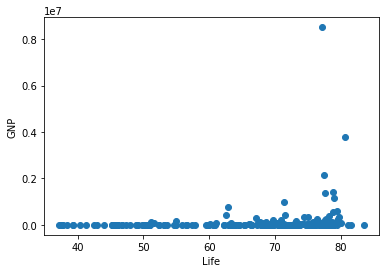

In [15]:
import psycopg2 as pg
import matplotlib.pyplot as plt       
### BEGIN SOLUTION
plt.scatter(lifes, gnps)
plt.xlabel('Life')
plt.ylabel('GNP')
plt.savefig("results/plot7.png")
### END SOLUTION


In [16]:
### BEGIN HIDDEN TESTS
import psycopg2 as pg
import matplotlib.pyplot as plt  

from matplotlib.testing.compare import compare_images


plt.scatter(lifes,gnps)
plt.xlabel('Life')
plt.ylabel('GNP')
plt.savefig("results/plot7_.png")
plt.close()

assert isinstance(compare_images("results/plot7.png","results/plot7_.png", tol=0.1), type(None)), "The plots are not the same. Make sure you have used the correct syntax."

import os
if os.path.isfile('results/plot7.png'):
    os.remove('results/plot7.png')

### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 8

Perform the following task:

- Based on the scatter plot from **Question 7**,
- Zoom into the scatter plot created in the previous question by setting the plot limits:
```python
plt.xlim(40, 85)
plt.ylim(0, 100000)
```
- Save the plot as `"results/plot8.png"`


**Note:**
- You must continue from the same base plot used in Question 7.
```python
plt.scatter(lifes, gnps)
plt.xlabel('Life')
plt.ylabel('GNP')
```
- Do not add any extra plot elements or labels beyond what was specified earlier.
- Plot validation will fail if additional components are added.
- The saved file must have the exact filename and location for successful validation.

In [17]:
import psycopg2 as pg
import matplotlib.pyplot as plt       
### BEGIN SOLUTION
# then zoom in
plt.scatter(lifes,gnps)
plt.xlabel('Life')
plt.ylabel('GNP')
plt.xlim(40,85)
plt.ylim(0,100000)
plt.savefig("results/plot8.png")
plt.close()
### END SOLUTION


In [18]:

### BEGIN HIDDEN TESTS


from matplotlib.testing.compare import compare_images


# then zoom in
plt.scatter(lifes,gnps)
plt.xlabel('Life')
plt.ylabel('GNP')
plt.xlim(40,85)
plt.ylim(0,100000)
plt.savefig("results/plot8_.png")
plt.close()
#
#
#
assert isinstance(compare_images("results/plot8.png","results/plot8_.png", tol=0.1), type(None)), "The plots are not the same. Make sure you have used the correct syntax."

import os
if os.path.isfile('results/plot8.png'):
    os.remove('results/plot8.png')

### END HIDDEN TESTS


###### [Back to top](#Index:) 

### Question 9

**Perform the following task:**

- Use the following SQL query, which solves the **"multiple winners problem"** by identifying all customers who placed the highest number of rentals (orders):

  ```sql
  sql = '''WITH top_num_orders AS
            (SELECT COUNT(*) AS num_orders
            FROM customer INNER JOIN rental
            ON customer.customer_id = rental.customer_id
            GROUP BY customer.customer_id
            ORDER BY num_orders DESC 
            LIMIT 1),
            all_customer_orders AS 
              (SELECT customer.customer_id, COUNT(*) AS num_orders 
              FROM rental INNER JOIN customer
              ON customer.customer_id = rental.customer_id 
              INNER JOIN top_num_orders
              ON top_num_orders.num_orders = num_orders
              GROUP BY customer.customer_id
              ORDER BY num_orders DESC)
            SELECT all_customer_orders.customer_id, top_num_orders.num_orders FROM all_customer_orders 
            INNER JOIN top_num_orders
            ON all_customer_orders.num_orders = top_num_orders.num_orders'''
  ```


- Use the **connection** defined at the beginning of this assignment to run the query.
- Load the results into a Pandas DataFrame and assign it to a variable named **`df`**.


**Note:**

- Use `pd.read_sql()` to run the query and load it directly into the DataFrame.
- Make sure the resulting DataFrame contains both `customer_id` and `num_orders` columns as returned by the query.


In [19]:
df = None
sql = '''WITH top_num_orders AS
        (SELECT COUNT(*) AS num_orders
        FROM customer INNER JOIN rental
        ON customer.customer_id = rental.customer_id
        GROUP BY customer.customer_id
        ORDER BY num_orders DESC 
        LIMIT 1),
        all_customer_orders AS 
          (SELECT customer.customer_id, COUNT(*) AS num_orders 
          FROM rental INNER JOIN customer
          ON customer.customer_id = rental.customer_id 
          INNER JOIN top_num_orders
          ON top_num_orders.num_orders = num_orders
          GROUP BY customer.customer_id
          ORDER BY num_orders DESC)
        SELECT all_customer_orders.customer_id, top_num_orders.num_orders FROM all_customer_orders 
        INNER JOIN top_num_orders
        ON all_customer_orders.num_orders = top_num_orders.num_orders'''

### BEGIN SOLUTION
df = pd.read_sql(sql, con=connection)
### END SOLUTION
#Answer test
df.head()

,customer_id,num_orders
0,148,46


In [20]:
### BEGIN HIDDEN TESTS
sql_ = '''WITH top_num_orders AS
        (SELECT COUNT(*) AS num_orders
        FROM customer INNER JOIN rental
        ON customer.customer_id = rental.customer_id
        GROUP BY customer.customer_id
        ORDER BY num_orders DESC 
        LIMIT 1),
        all_customer_orders AS 
          (SELECT customer.customer_id, COUNT(*) AS num_orders 
          FROM rental INNER JOIN customer
          ON customer.customer_id = rental.customer_id 
          INNER JOIN top_num_orders
          ON top_num_orders.num_orders = num_orders
          GROUP BY customer.customer_id
          ORDER BY num_orders DESC)
        SELECT all_customer_orders.customer_id, top_num_orders.num_orders FROM all_customer_orders 
        INNER JOIN top_num_orders
        ON all_customer_orders.num_orders = top_num_orders.num_orders'''
df_ = pd.read_sql(sql_, con=connection)

from pandas.testing import assert_frame_equal
assert_frame_equal(df, df_)
### END HIDDEN TESTS

###### [Back to top](#Index:) 

### Question 10

**Perform the following tasks:**

- Use the **northwind** database to create a DataFrame by executing an SQL query.
- The query should select **all columns** from the `suppliers` table **where the `country` column value is equal to `'Japan'`**. Assign the query (in string format) to the variable **`sql`**.
- Store the resulting data in a Pandas DataFrame and assign it to a variable named **`jpsuppliers_df`**.

**Notes:**
- Use the `pd.read_sql()` method to execute the query and load the results into the DataFrame.
- Make sure that the database connection is made using appropriate credentials. The connection object is given, please do not make changes to it unless necessary.
- Ensure the SQL query includes proper case sensitivity for string literals (i.e., `'Japan'` with capital "J").



In [21]:
jpsuppliers_df = None  

connection = pg.connect(host = 'localhost',
                       database = 'northwind',
                       user = 'postgres',
                       password = 'codio')
sql = None
### BEGIN SOLUTION
sql = "select * from suppliers WHERE country = 'Japan'"
jpsuppliers_df = pd.read_sql(sql, con=connection)
### END SOLUTION
#Answer test
jpsuppliers_df.head()

,supplier_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax,homepage
0,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,None,100,Japan,(03) 3555-5011,None,None
1,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,None,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...


In [22]:

### BEGIN HIDDEN TESTS
connection_ = pg.connect(host = 'localhost',
                       database = 'northwind',
                       user = 'postgres',
                       password = 'codio')
sql_ = "select * from suppliers WHERE country = 'Japan'"
jpsuppliers_df_ = pd.read_sql(sql_, con=connection_)

from pandas.testing import assert_frame_equal
assert_frame_equal(jpsuppliers_df_, jpsuppliers_df)
### END HIDDEN TESTS
